In [122]:
import sys
sys.path.append('..')
from src.model.components.decision_transformer.utils import D4RLTrajectoryDataset

from src.model.components.commons.utils import compute_mean_std, normalize_states, extend_and_repeat, extend_and_repeat
from src.model.components.commons.utils import wrap_env, set_seed, wandb_init, eval_actor, modify_reward, init_module_weights
from src.model.components.commons.utils import ReplayBuffer, TensorBatch

In [133]:
dataset = D4RLTrajectoryDataset('/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/data/halfcheetah-medium-expert-v2.pkl', 30, 1000)
b = dataset.trajectories

In [134]:

result_dict = {}
import numpy as np
# 리스트의 각 딕셔너리를 순회하며 키별로 값을 더함
for d in b:
    for key, value in d.items():
        if key in result_dict:
            result_dict[key] = np.concatenate((result_dict[key], value), axis=0)
        else:
            result_dict[key] = value

In [152]:
result_dict.keys()

dict_keys(['observations', 'next_observations', 'actions', 'rewards', 'terminals', 'returns_to_go'])

In [135]:
print(result_dict['observations'].max())
print(result_dict['observations'].min())
print(result_dict['actions'].max())
print(result_dict['actions'].min())
print(result_dict['rewards'].max())
print(result_dict['rewards'].min())

44.669758
-9.422874
1.0
-1.0
13.854624
-3.0135136


In [136]:
modify_reward(result_dict, 'halfcheetah-medium-expert-v2')

dict_keys(['observations', 'next_observations', 'actions', 'rewards', 'terminals', 'returns_to_go'])
dict_keys(['observations', 'next_observations', 'actions', 'rewards', 'terminals', 'returns_to_go'])
dict_keys(['observations', 'next_observations', 'actions', 'rewards', 'terminals', 'returns_to_go'])


In [147]:
print(result_dict['observations'].max())
print(result_dict['observations'].min())
print(result_dict['observations'].mean())
print(result_dict['observations'].std())
print(result_dict['actions'].max())
print(result_dict['actions'].min())
print(result_dict['rewards'].max())
print(result_dict['rewards'].min())

44.669758
-9.422874
-0.000117633375
1.0007164
1.0
-1.0
1.1982615
-0.26063338


In [138]:
with open('/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/data/halfcheetah-medium-expert-v2.pkl','rb') as f:
    import pickle
    data = pickle.load(f)

In [141]:
result_dict2 = {}
import numpy as np
# 리스트의 각 딕셔너리를 순회하며 키별로 값을 더함
for d in data:
    for key, value in d.items():
        if key in result_dict2:
            result_dict2[key] = np.concatenate((result_dict2[key], value), axis=0)
        else:
            result_dict2[key] = value

In [142]:
print(result_dict['observations'].max())
print(result_dict['observations'].min())
print(result_dict['actions'].max())
print(result_dict['actions'].min())
print(result_dict['rewards'].max())
print(result_dict['rewards'].min())

44.669758
-9.422874
1.0
-1.0
1.1982615
-0.26063338


In [143]:
import gym
env = gym.make("halfcheetah-medium-expert-v2")

ds = d4rl.qlearning_dataset(env)

/home/jaewoo/anaconda3/envs/augmentation/lib/python3.7/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|██████████| 9/9 [00:03<00:00,  2.45it/s]


In [146]:
print(ds['observations'].max())
print(ds['observations'].min())
print(ds['observations'].mean())
print(ds['observations'].std())
print(ds['actions'].max())
print(ds['actions'].min())
print(ds['rewards'].max())
print(ds['rewards'].min())

31.478853
-32.988655
0.48144776
5.6200495
1.0
-1.0
13.854624
-3.0135136


In [148]:

state_mean, state_std = compute_mean_std(ds["observations"], eps=1e-3)
ds["observations"] = normalize_states(
        ds["observations"], state_mean, state_std
)

In [149]:
print(ds['observations'].max())
print(ds['observations'].min())
print(ds['observations'].mean())
print(ds['observations'].std())
print(ds['actions'].max())
print(ds['actions'].min())
print(ds['rewards'].max())
print(ds['rewards'].min())

44.57319
-9.402407
-0.000117424555
0.9983928
1.0
-1.0
13.854624
-3.0135136


In [150]:
modify_reward(ds, 'halfcheetah-medium-expert-v2')

dict_keys(['observations', 'actions', 'next_observations', 'rewards', 'terminals'])
dict_keys(['observations', 'actions', 'next_observations', 'rewards', 'terminals'])
dict_keys(['observations', 'actions', 'next_observations', 'rewards', 'terminals'])


In [151]:
print(ds['observations'].max())
print(ds['observations'].min())
print(ds['observations'].mean())
print(ds['observations'].std())
print(ds['actions'].max())
print(ds['actions'].min())
print(ds['rewards'].max())
print(ds['rewards'].min())

44.57319
-9.402407
-0.000117424555
0.9983928
1.0
-1.0
1.2905824
-0.28071406


In [1]:
import gym

In [60]:
gym.__version__

'0.23.0'

In [3]:
gym.make("hopper-medium-expert-v2")

UnregisteredEnv: No registered env with id: hopper-medium-expert-v2

In [1]:
import gym
# import d4rl

In [2]:
gym.make('hopper-medium-expert-v2')

UnregisteredEnv: No registered env with id: hopper-medium-expert-v2

In [3]:
import d4rl
gym.make('hopper-medium-expert-v2')

No module named 'flow'
/home/jaewoo/anaconda3/envs/augmentation/lib/python3.7/site-packages/glfw/__init__.py:916: GLFWError: (65544) b'X11: The DISPLAY environment variable is missing'
  warnings.warn(message, GLFWError)


pygame 2.4.0 (SDL 2.26.4, Python 3.7.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


pybullet build time: May 20 2022 19:43:01
/home/jaewoo/anaconda3/envs/augmentation/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


<TimeLimitNormalized: <OfflineHopperEnv instance>>

In [53]:
import numpy as np

In [54]:
d = np.load('/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/data/generated_data/mixer_cond_model-500000_bf_all_with_reward.npy', allow_pickle=True)

In [55]:
d[0].keys()

dict_keys(['observations', 'actions', 'next_observations', 'rewards'])

In [58]:
d[0].keys()


dict_keys(['observations', 'actions', 'next_observations', 'rewards'])

In [57]:
d[0]['observations'].shape


(31, 17)

In [59]:
d = np.load("/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/data/generated_data/hopper-medium-expert-v2debug1.npy", allow_pickle=True)

In [66]:
d[1]['rewards'].mean()

-237.77594

In [67]:
import torch

In [70]:
torch.load('/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/reward_model/hopper-medium-expert-v2.pt')

OrderedDict([('net.0.weight',
              tensor([[ 0.0189,  0.0809, -0.1404,  ...,  0.0493, -0.0118, -0.0372],
                      [-0.0362, -0.0215,  0.0530,  ...,  0.0539,  0.1055, -0.1067],
                      [-0.0537, -0.0344, -0.0845,  ..., -0.0610, -0.0129, -0.0265],
                      ...,
                      [-0.1284,  0.0494,  0.1802,  ..., -0.0037, -0.0805, -0.0758],
                      [ 0.1805, -0.0215, -0.0478,  ..., -0.0208, -0.1258, -0.0684],
                      [ 0.1110,  0.0621,  0.1391,  ...,  0.0292, -0.0328,  0.0242]],
                     device='cuda:4')),
             ('net.0.bias',
              tensor([ 0.2967, -0.0395, -0.1025, -0.0144,  0.2370,  0.1537,  0.0122, -0.1486,
                      -0.1501, -0.0283, -0.2845,  0.0293, -0.3257,  0.1086, -0.1930, -0.1820,
                      -0.2486,  0.1483, -0.2380,  0.0012,  0.2590,  0.1146,  0.1127,  0.1378,
                      -0.0024,  0.0186,  0.0645, -0.3355, -0.1598, -0.0756, -0.0839, -0.

In [18]:
import numpy as np
d = np.load('/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/data/generated_data/hopper-medium-expert-v2_debug1.npy', allow_pickle=True)

In [22]:
np.save('/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/data/generated_data/hopper-medium-expert-v2_debug1.npy', d[:277777])

In [ ]:
45:25 = 50:?

In [15]:
print(d[1]['rewards'].mean())
print(d[1]['rewards'].std())
print(d[1]['observations'].mean())
print(d[1]['observations'].std())
print(d[1]['actions'].mean())
print(d[1]['actionss'].std())

4.449591064453125

In [20]:
4999680/20

249984.0

In [19]:
d.shape

(4999680,)

In [17]:
d[1]['observations'].std()

2.0922406

In [2]:
import pickle

with open('/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/data/hopper-medium-expert-v2.pkl', 'rb') as f:
    d = pickle.load(f)

In [7]:
d[0]['observations'].mean()

0.16248186

In [8]:
d[0]['observations'].std()

1.9934351

In [11]:
d[0]['rewards'].mean()

3.117414

In [12]:
d[0]['rewards'].std()

0.9951647

In [3]:
cd ..

/mnt/HDD/jaewoo/practices/diffusers/Augmentation-For-OfflineRL


In [9]:


dataset = SequenceDataset(
        env='hopper-medium-expert-v2',
        horizon=20,
        normalizer=CDFNormalizer,
        preprocess_fns=[],
        use_padding=True,
        max_path_length=1000,
        include_returns=True,
        returns_scale=400,
        discount=0.99,
        termination_penalty=-100
    )

load datafile:   0%|          | 0/9 [00:00<?, ?it/s]

load datafile: 100%|██████████| 9/9 [00:02<00:00,  3.10it/s]


[ datasets/buffer ] Finalized replay buffer | 3213 episodes
[ datasets/buffer ] Fields:
    actions: (3213, 1000, 3)
    infos/action_log_probs: (3213, 1000, 1)
    infos/qpos: (3213, 1000, 6)
    infos/qvel: (3213, 1000, 6)
    next_observations: (3213, 1000, 11)
    observations: (3213, 1000, 11)
    rewards: (3213, 1000, 1)
    terminals: (3213, 1000, 1)
    timeouts: (3213, 1000, 1)
    normed_observations: (3213, 1000, 11)
    normed_actions: (3213, 1000, 3)


In [13]:
dataset[0].trajectories

array([[ 9.64311302e-01, -8.21179330e-01, -6.17705323e-02,
        -2.22447738e-01,  9.08632576e-01,  9.70481157e-01,
         1.52282685e-01, -8.13423991e-02, -9.89488840e-01,
         8.57337192e-02, -4.68500555e-02,  6.28908649e-02,
         1.73750132e-01, -6.26718029e-02],
       [ 5.20325124e-01, -8.20882261e-01, -9.56216902e-02,
        -2.23528057e-01,  9.03177977e-01,  9.71486449e-01,
         1.00519158e-01, -8.19035694e-02, -9.98439550e-01,
         5.96909076e-02, -4.51567471e-01,  1.19337805e-01,
        -6.01345420e-01, -1.09693907e-01],
       [ 2.57164150e-01, -6.05429649e-01, -3.05936784e-01,
        -2.26932079e-01,  8.83479059e-01,  9.73087907e-01,
        -8.33850168e-03, -8.38841647e-02, -9.99786913e-01,
         3.04661393e-02, -7.76347876e-01,  9.77833346e-02,
        -7.41893589e-01, -1.50256082e-01],
       [ 7.49818921e-01, -7.86511958e-01, -4.43152934e-02,
        -2.32668802e-01,  8.55526686e-01,  9.73904192e-01,
        -1.17719315e-01, -8.93998221e-02, -9.

In [22]:
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from corl.diffusers.sequence import SequenceDataset
from corl.diffusers.normalization import CDFNormalizer

loader = DataLoader(dataset, batch_size=1978328)

In [21]:
dataset.__len__()

1978328

load datafile:   0%|          | 0/21 [00:00<?, ?it/s]

load datafile: 100%|██████████| 21/21 [00:02<00:00,  9.40it/s]


[ datasets/buffer ] Finalized replay buffer | 1000 episodes
[ datasets/buffer ] Fields:
    actions: (1000, 1000, 6)
    infos/action_log_probs: (1000, 1000, 1)
    infos/qpos: (1000, 1000, 9)
    infos/qvel: (1000, 1000, 9)
    next_observations: (1000, 1000, 17)
    observations: (1000, 1000, 17)
    rewards: (1000, 1000, 1)
    terminals: (1000, 1000, 1)
    timeouts: (1000, 1000, 1)
    normed_observations: (1000, 1000, 17)
    normed_actions: (1000, 1000, 6)
tensor(1.1207)
tensor(0.2381)
tensor(-0.1044)
tensor(1.4823)


(array([2.2800e+02, 1.5740e+03, 2.0160e+03, 1.2610e+03, 4.3800e+02,
        2.9600e+02, 4.1000e+01, 2.9000e+01, 3.5000e+01, 3.5000e+01,
        3.2000e+01, 2.8000e+01, 2.6000e+01, 2.6000e+01, 3.1000e+01,
        4.6000e+01, 7.5000e+01, 1.2900e+02, 2.2600e+02, 3.8000e+02,
        6.2000e+02, 9.2300e+02, 1.2770e+03, 1.5270e+03, 1.6080e+03,
        1.7110e+03, 1.7000e+03, 1.7690e+03, 1.8180e+03, 1.8560e+03,
        1.8680e+03, 1.8960e+03, 1.9400e+03, 2.0580e+03, 2.0710e+03,
        2.0560e+03, 2.1450e+03, 2.1660e+03, 2.2400e+03, 2.2740e+03,
        2.3840e+03, 2.4360e+03, 2.4730e+03, 2.5090e+03, 2.5860e+03,
        2.6660e+03, 2.6840e+03, 2.8750e+03, 2.9830e+03, 3.0420e+03,
        3.2230e+03, 3.3200e+03, 3.5030e+03, 3.5180e+03, 3.6850e+03,
        3.7240e+03, 3.8850e+03, 4.1380e+03, 4.3620e+03, 4.6330e+03,
        5.0770e+03, 5.0560e+03, 5.5100e+03, 5.8520e+03, 6.5440e+03,
        7.2990e+03, 7.9030e+03, 8.9640e+03, 9.9280e+03, 1.0794e+04,
        1.1739e+04, 1.3491e+04, 1.5810e+04, 1.77

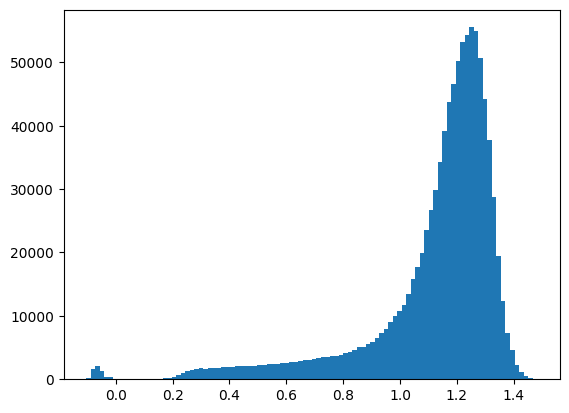

In [28]:
dataset = SequenceDataset(
        env='halfcheetah-medium-v2',
        horizon=20,
        normalizer=CDFNormalizer,
        preprocess_fns=[],
        use_padding=True,
        max_path_length=1000,
        include_returns=True,
        returns_scale=400,
        discount=0.99,
        termination_penalty=-100
    )
loader = DataLoader(dataset, batch_size=dataset.__len__())
for item in loader:
    print(item.returns.mean())
    print(item.returns.std())
    print(item.returns.min())
    print(item.returns.max())
    break
returns = item.returns.detach().numpy()
plt.hist(returns, bins=100)

(array([2.23400e+03, 2.19700e+03, 2.27600e+03, 2.27500e+03, 2.29200e+03,
        2.29300e+03, 2.29700e+03, 2.29400e+03, 2.30400e+03, 2.33300e+03,
        2.38200e+03, 2.38400e+03, 2.42900e+03, 2.45100e+03, 2.46900e+03,
        2.51000e+03, 2.58500e+03, 2.65600e+03, 2.70900e+03, 2.76300e+03,
        2.79700e+03, 2.86200e+03, 2.88000e+03, 2.93300e+03, 2.95500e+03,
        3.00100e+03, 3.00800e+03, 3.05200e+03, 3.10400e+03, 3.15500e+03,
        3.34800e+03, 4.03100e+03, 4.64000e+03, 4.89500e+03, 4.95800e+03,
        5.09300e+03, 5.11200e+03, 5.25800e+03, 5.36000e+03, 5.48900e+03,
        5.63300e+03, 5.78800e+03, 6.02700e+03, 6.10600e+03, 6.38100e+03,
        6.48800e+03, 6.68300e+03, 6.98400e+03, 7.39700e+03, 7.48300e+03,
        7.64600e+03, 7.45700e+03, 7.61200e+03, 7.92000e+03, 8.28700e+03,
        8.75100e+03, 9.26000e+03, 9.98300e+03, 1.10780e+04, 1.25210e+04,
        1.45130e+04, 1.70910e+04, 2.02220e+04, 2.33510e+04, 2.54120e+04,
        2.70630e+04, 2.85570e+04, 3.03030e+04, 3.31

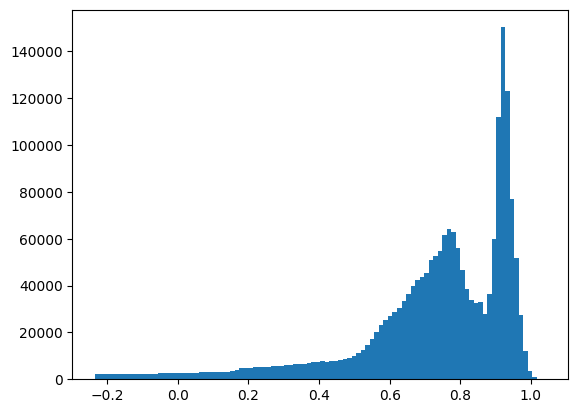

In [16]:
dataset[3:5].returns

ValueError: not enough values to unpack (expected 3, got 2)

In [35]:
import numpy as np
data = np.load("/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/data/generated_data/5M-1_1x-temporalattention-50-sar.npy", allow_pickle=True)

In [52]:
data[-1]

{'modelled_terminals': True,
 'make_inputs': {'modelled_terminals': {'modelled_terminals': None}},
 'split_diffusion_samples': {'modelled_terminals': {'modelled_terminals': None},
  'terminal_threshold': 0.5},
 'construct_diffusion_model': {'normalizer_type': 'standard',
  'denoising_network': {'_target_': 'src.diffusion.denoiser_network.temporal_attention.TemporalUnet',
   'horizon': 32,
   'd_in': 4,
   'dim': 128,
   'cond_dim': 1,
   'condition_dropout': 0.25,
   'use_dropout': True,
   'force_dropout': False,
   'learned_sinusoidal_cond': False,
   'random_fourier_features': True,
   'learned_sinusoidal_dim': 16},
  'disable_terminal_norm': True},
 'ElucidatedDiffusion': {'num_sample_steps': 128,
  'sigma_data': 1.0,
  'S_churn': 80,
  'S_tmin': 0.05,
  'S_tmax': 50,
  'S_noise': 1.003},
 'Trainer': {'train_batch_size': 255,
  'train_lr': 0.0003,
  'lr_scheduler': 'cosinewarmup',
  'weight_decay': 0,
  'train_num_steps': 1000000,
  'save_and_sample_every': 10000},
 'SimpleDiffusio

In [70]:
diffusion_horizon = data[-1]['construct_diffusion_model']['denoising_network']['horizon']
diffusion_backborn = data[-1]['construct_diffusion_model']['denoising_network']['_target_'].split('.')[-1]
conditioned = True if data[-1]['construct_diffusion_model']['denoising_network']['cond_dim'] != 0 else False
if data[-1]['Dataset']['modalities'].__len__() == 3:
    generation_type = 's,a,r'
elif data[-1]['Dataset']['modalities'].__len__() == 2:
    generation_type = 's,a'
elif data[-1]['Dataset']['modalities'].__len__() == 3:
    generation_type = 's'
else:
    raise ValueError()
guidance_temperature = 1
guidance_target_multiple = data[-1]['SimpleDiffusionGenerator']['guidance_rewardscale']
noise_level = data[-1]['SimpleDiffusionGenerator']['noise_level']

In [74]:
data[-1].keys()

dict_keys(['modelled_terminals', 'make_inputs', 'split_diffusion_samples', 'construct_diffusion_model', 'ElucidatedDiffusion', 'Trainer', 'SimpleDiffusionGenerator', 'Dataset'])

In [76]:
aa = np.random.randn(10000,100)

In [ ]:
aa